# 🌐 Emergent Behavior Using TensorFlow

This notebook simulates emergent behavior using a group of simple neural networks (agents) implemented in TensorFlow.
Each agent adjusts its internal state based on the average state of the population. Over time, the system may exhibit convergence, oscillation, or clustering—demonstrating **emergence**.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(42)

## 🧠 Define Agent Model
Each agent is a simple neural network with a single dense layer that maps 3 inputs to 1 output.

In [20]:
class Agent:
    def __init__(self):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(1, input_shape=(3,), activation='tanh', use_bias=True)
        ])
        self.state = tf.Variable(tf.random.uniform([1], 0, 1))

    def update(self, mean_state, all_states):
        state_val = tf.squeeze(self.state)             # scalar
        mean_val = tf.squeeze(mean_state)              # scalar
        diff_val = mean_val - state_val                # scalar

        # (1, 3) input tensor
        inputs = tf.convert_to_tensor([[state_val, mean_val, diff_val]], dtype=tf.float32)

        delta = tf.squeeze(self.model(inputs))         # scalar

        # Rozszerzamy do shape=[1], żeby pasowało do self.state
        self.state.assign_add(tf.reshape(0.1 * delta, (1,)))


## 🔄 Simulation Parameters

In [21]:
NUM_AGENTS = 30
STEPS = 100

agents = [Agent() for _ in range(NUM_AGENTS)]
history = []

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
for step in range(STEPS):
    current_states = tf.stack([agent.state for agent in agents])
    mean_state = tf.reduce_mean(current_states)

    for agent in agents:
        agent.update(mean_state, current_states)

    history.append([agent.state.numpy()[0] for agent in agents])

## 📊 Visualize Results

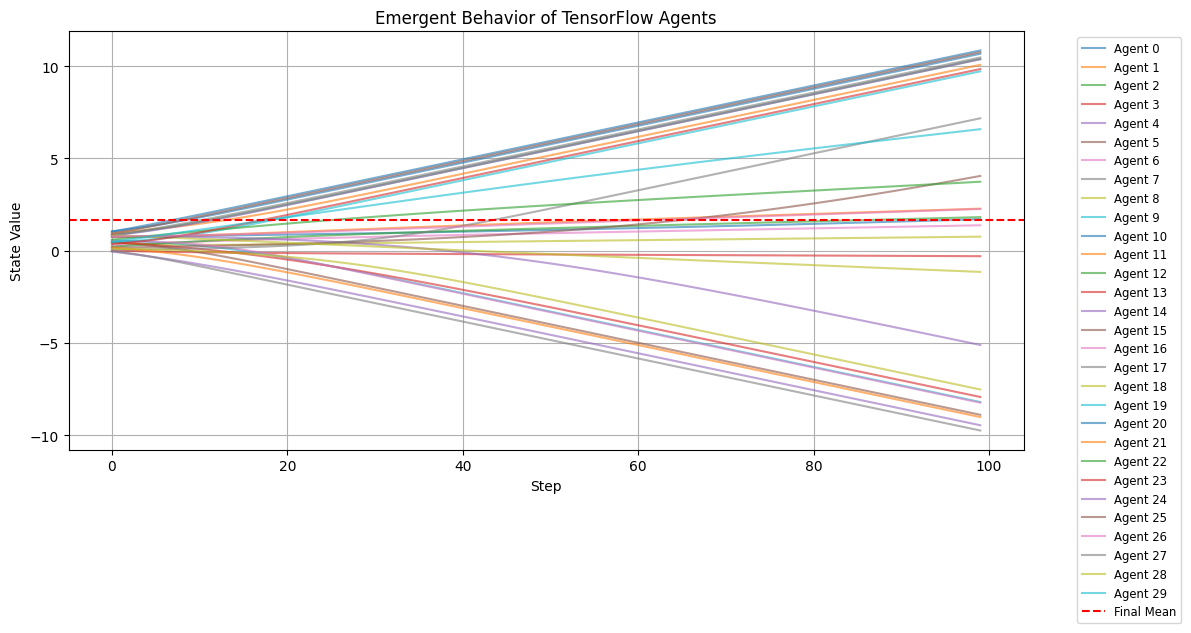

In [23]:
history = np.array(history)
plt.figure(figsize=(12, 6))
for i in range(NUM_AGENTS):
    plt.plot(history[:, i], alpha=0.6, label=f"Agent {i}")
plt.axhline(y=np.mean(history[-1]), color='r', linestyle='--', label='Final Mean')
plt.title("Emergent Behavior of TensorFlow Agents")
plt.xlabel("Step")
plt.ylabel("State Value")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()